<a href="https://colab.research.google.com/github/NavyaKiran/NetflixDataAnalysis/blob/main/Netflix_EDA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
data = pd.read_csv('netflix_titles.csv')
#load the file into a dataframe using pd.read_csv()
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
data = data[data['release_year'] >= 2010]

In [25]:
data.columns
#columns in the dataframe

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [26]:
data.shape
#there are 8807 rows and 12 columns

(7472, 12)

In [27]:
data.info()
#print out the information of columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7472 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7472 non-null   object
 1   type          7472 non-null   object
 2   title         7472 non-null   object
 3   director      5021 non-null   object
 4   cast          6679 non-null   object
 5   country       6688 non-null   object
 6   date_added    7465 non-null   object
 7   release_year  7472 non-null   int64 
 8   rating        7468 non-null   object
 9   duration      7469 non-null   object
 10  listed_in     7472 non-null   object
 11  description   7472 non-null   object
dtypes: int64(1), object(11)
memory usage: 758.9+ KB


In [28]:
data.size
#number of elements in the dataset
#an element is represented by the value contained in the intersection of a row and column

89664

In [29]:
data.dtypes
#the data type of each feature in the dataset

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [30]:
data.duplicated().sum()
#data.drop_duplicates(inplace = True)
#check for duplicates within the dataframe

0

In [31]:
data.isnull().sum()
#look for null values in the dataframe
#can we handle them?
#these values are categorical in nature and not a range of values/continous values
#so, it would not make sense to replace them with another value

show_id            0
type               0
title              0
director        2451
cast             793
country          784
date_added         7
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

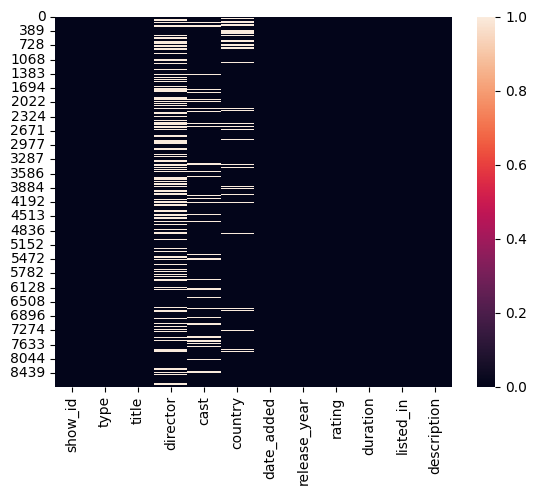

In [32]:
#use a heat map to display those null values
import seaborn as sns
sns.heatmap(data.isnull())
#the lines show the null values with 'director' having the greatest number of missing values

In [33]:
#who is the director of house of cards and what is the show id
#data[data['title'].isin(['House of Cards'])]
data[data['title'].str.contains('House of Cards')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [34]:
#Which year were the highest number of TV shows and movies released?
data['release_year'].value_counts()
#2018 had the most number of releases

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
Name: release_year, dtype: int64

<Axes: >

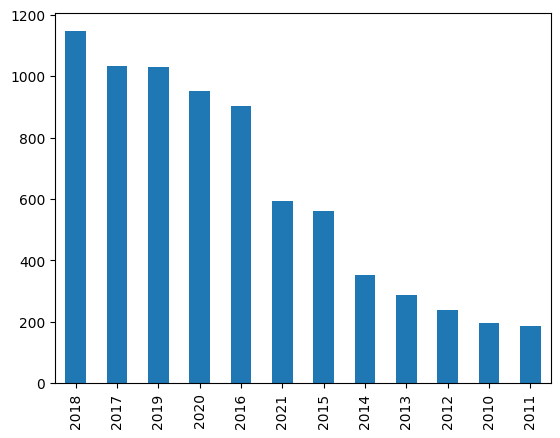

In [35]:
#plot the above as a bar graph
data['release_year'].value_counts().plot(kind = 'bar')

In [39]:
#How many movies and tv shows are in the dataset

data.groupby(['type'])['title'].count()

type
Movie      4978
TV Show    2494
Name: title, dtype: int64

<Axes: xlabel='count', ylabel='type'>

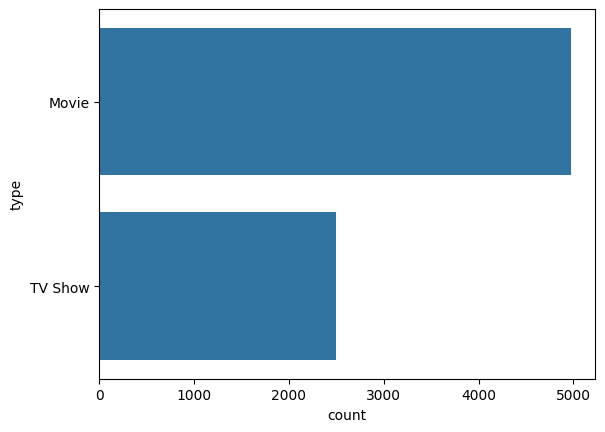

In [40]:
#display the above results as a countplot

sns.countplot(data['type'])

In [47]:
(data['type'] == 'Movie') & (data['release_year'] == 2010)
data[(data['type'] == 'Movie') & (data['release_year'] == 2010)]
#movies which were released in the year 2010

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
60,s61,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ..."
138,s139,Movie,Dear John,Lasse Hallström,"Channing Tatum, Amanda Seyfried, Richard Jenki...",United States,"September 1, 2021",2010,PG-13,108 min,"Dramas, Romantic Movies","While on summer leave, a U.S. soldier falls fo..."
156,s157,Movie,Letters to Juliet,Gary Winick,"Amanda Seyfried, Christopher Egan, Gael García...",United States,"September 1, 2021",2010,PG,105 min,"Comedies, Dramas, Romantic Movies",By responding to a letter addressed to Shakesp...
159,s160,Movie,Love in a Puff,Pang Ho-cheung,"Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...",Hong Kong,"September 1, 2021",2010,TV-MA,103 min,"Comedies, Dramas, International Movies",When the Hong Kong government enacts a ban on ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8585,s8586,Movie,Three-Quarters Decent,Mohamed Hamdy,"Mohamed Ragab, Lamitta Frangieh, Mohsen Mansou...",NaN,"June 20, 2019",2010,TV-14,96 min,"Comedies, Dramas, International Movies","Determined to fight corruption in his country,..."
8638,s8639,Movie,Tucker and Dale vs. Evil,Eli Craig,"Tyler Labine, Alan Tudyk, Katrina Bowden, Jess...","Canada, United States, India, United Kingdom","March 29, 2019",2010,R,89 min,"Comedies, Horror Movies, Independent Movies","Expecting to relax at their ""vacation"" cabin, ..."
8643,s8644,Movie,Twice,Hidetaka Inazuka,Stuart Varnam-Atkin,"Japan, United States","December 31, 2017",2010,TV-14,53 min,"Documentaries, International Movies",This documentary reenacts the experiences of l...
8750,s8751,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",2010,R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te..."


In [49]:
#movies released in india

data[(data['country'] == 'India') & (data['type'] == 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,"September 2, 2021",2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,"September 2, 2021",2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
126,s127,Movie,Shikara,Vidhu Vinod Chopra,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",India,"September 2, 2021",2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies",A couple must strive to remain resilient after...
190,s191,Movie,Thimmarusu,Sharan Koppisetty,"Satya Dev, Priyanka Jawalkar, Brahmaji",India,"August 28, 2021",2021,TV-14,125 min,"Dramas, International Movies",Eight years after a young man is framed for mu...
...,...,...,...,...,...,...,...,...,...,...,...,...
8762,s8763,Movie,Wrong Side Raju,Mikhil Musale,"Pratik Gandhi, Kimberley Louisa McBeath, Asif ...",India,"October 1, 2017",2016,TV-MA,140 min,"Dramas, International Movies",The life of a chauffeur and part-time bootlegg...
8771,s8772,Movie,Yaara O Dildaara,Ksshitij Chaudhary,"Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulza...",India,"November 1, 2017",2011,TV-14,132 min,"Dramas, International Movies, Music & Musicals",The patriarch of a wealthy family with one ind...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...


In [57]:
#title of all tv shows released in India

data[(data['type'] == 'TV Show') & (data['country'] == 'India')]['title'].reset_index()

,index,title
0,4,Kota Factory
1,39,Chhota Bheem
2,50,Dharmakshetra
3,66,Raja Rasoi Aur Anya Kahaniyan
4,69,Stories by Rabindranath Tagore
...,...,...
73,8173,Thackeray
74,8235,The Calling
75,8321,The Golden Years with Javed Akhtar
76,8349,The House That Made Me


In [58]:
#top 10 directors

data['director'].value_counts()[:10]

Raúl Campos, Jan Suter    18
Rajiv Chilaka             17
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Jay Chapman               12
Cathy Garcia-Molina       11
Don Michael Paul          10
Hakan Algül                8
Lance Bangs                8
Name: director, dtype: int64

In [11]:
#records where category is movie and type is comedy or country is United Kingdom

In [60]:
data[((data['type'] == 'Movie') & (data['listed_in'] == 'Comedies')) | (data['country'] == 'United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


In [70]:
#Movies where the cast includes Mary Berry

data['cast'] = data['cast'].astype('str')
data[data['cast'].str.contains('Mary Berry')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
4461,s4462,TV Show,The Great British Baking Show: The Beginnings,NaN,"Paul Hollywood, Mary Berry, Mel Giedroyc, Sue ...",NaN,"November 1, 2018",2012,TV-PG,1 Season,"British TV Shows, Reality TV",A dozen amateur bakers amiably compete for the...
8331,s8332,TV Show,The Great British Baking Show: Masterclass,NaN,"Mary Berry, Paul Hollywood",United Kingdom,"December 1, 2018",2018,TV-PG,4 Seasons,"British TV Shows, Reality TV",Hosts Mary Berry and Paul Hollywood leave the ...


In [73]:
#different types of ratings
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [74]:
data['rating'].nunique()

17

In [79]:
#movies with the TV-14 rating in Canada

data[(data['rating'] == 'TV-14') & (data['country'] == 'Canada') & (data['type'] == 'Movie')]['title']

157                                        Level 16
1279     Made You Look: A True Story About Fake Art
2769                 There's Something in the Water
3424    Martin Matte: La vie, la mort...eh la la..!
5972                               #cats_the_mewvie
5973                                          #Roxy
6192                                 At First Light
6537                     Counterfeiting in Suburbia
7334                              Long Time Running
7916                     Sadie's Last Days on Earth
7936                                     Sardaar ji
8178                    The Accountant of Auschwitz
8566                           The Wrong Babysitter
Name: title, dtype: object

In [82]:
data[(data['rating'] == 'TV-14') & (data['country'] == 'Canada') & (data['type'] == 'Movie')]['title'].nunique()

13

In [89]:
#How many TV shows have an R Rating after 2015

data[(data['rating'] == 'R') & (data['release_year'] > 2015) & (data['type']=='TV Show')]['title']

7593    Nobel
Name: title, dtype: object

In [90]:
#max duration of a movie/show
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '9 Seasons',
       '104 min', '127 min', '4 Seasons', '67 min', '94 min', '5 Seasons',
       '61 min', '103 min', '97 min', '106 min', '111 min', '3 Seasons',
       '110 min', '105 min', '96 min', '23 min', '115 min', '6 Seasons',
       '102 min', '85 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '93 min', '147 min', '87 min', '95 min', '92 min',
       '80 min', '117 min', '128 min', '119 min', '114 min', '99 min',
       '63 min', '121 min', '108 min', '100 min', '82 min', '88 min',
       '118 min', '120 min', '83 min', '112 min', '86 min', '125 min',
       '107 min', '124 min', '136 min', '133 min', '142 min', '70 min',
       '122 min', '84 min', '140 min', '78 min', '7 Seasons', '64 min',
       '59 min', '101 min', '98 min', '139 min', '135 min', '69 min',
       '116 min', '148 min', '76 min', '138 min', '81 min', '143 min',
       '132 min', '10 Seasons', '165 min', '123 min', '65 min', '66 min',
    

In [93]:
data[['minutes', 'unit']] = data['duration'].str.split(' ', expand = True)

In [94]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,nan,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [97]:
data_minutes = data[data['unit'] == 'min']
data_minutes.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,min
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91,min


In [108]:
data_minutes.loc[:,'minutes'] = data_minutes['minutes'].astype(int)

<ipython-input-108-29ac5ccf4544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_minutes.loc[:,'minutes'] = data_minutes['minutes'].astype(int)
<ipython-input-108-29ac5ccf4544>:2: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_minutes.max()


show_id                                                      s999
type                                                        Movie
title                                         최강전사 미니특공대 : 영웅의 탄생
cast            Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...
date_added                                      September 9, 2021
release_year                                                 2021
duration                                                   99 min
listed_in                                               Thrillers
description     Zixin is about to marry Qihong, but her galliv...
minutes                                                       312
unit                                                          min
dtype: object

In [110]:
data_minutes['minutes'].max()

312

In [115]:
#Which country has the highest number of TV shows

data[data['type'] == 'TV Show'].groupby(['country'])['title'].count().sort_values(ascending = False)[:1]

country
United States    703
Name: title, dtype: int64

In [117]:
#sort the dataset by release year

data.sort_values(by = 'release_year').reset_index()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,2745,s2746,Movie,The Runaways,Floria Sigismondi,"Kristen Stewart, Dakota Fanning, Michael Shann...",United States,"April 1, 2020",2010,R,107 min,"Dramas, Independent Movies, Music & Musicals",This biopic charts the rise of the rebellious ...,107,min
1,6857,s6858,TV Show,Glowing Embers,NaN,"Henley Hii, Debbie Goh, Frederick Lee, Wymen Y...",NaN,"August 14, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas","Amid Malaysia's charcoal industry, a woman def...",1,Season
2,6662,s6663,Movie,Easy A,Will Gluck,"Emma Stone, Penn Badgley, Amanda Bynes, Dan By...",United States,"November 1, 2020",2010,PG-13,92 min,"Comedies, Romantic Movies",When a lie about Olive's reputation transforms...,92,min
3,6433,s6434,Movie,Cats & Dogs: The Revenge of Kitty Galore,Brad Peyton,"James Marsden, Nick Nolte, Christina Applegate...","United States, Australia","February 1, 2019",2010,PG,82 min,"Children & Family Movies, Comedies",Cats and dogs must set aside their differences...,82,min
4,8643,s8644,Movie,Twice,Hidetaka Inazuka,Stuart Varnam-Atkin,"Japan, United States","December 31, 2017",2010,TV-14,53 min,"Documentaries, International Movies",This documentary reenacts the experiences of l...,53,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,857,s858,TV Show,The Neighbor,NaN,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,"May 21, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...,2,Seasons
7468,855,s856,TV Show,Jurassic World Camp Cretaceous,NaN,"Paul-Mikél Williams, Jenna Ortega, Sean Giambr...",United States,"May 21, 2021",2021,TV-Y7,3 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...",Six teens invited to attend a state-of-the-art...,3,Seasons
7469,854,s855,Movie,Creating an Army of the Dead,NaN,nan,NaN,"May 21, 2021",2021,TV-MA,29 min,Documentaries,"Zack Snyder and his ""Army of the Dead"" team di...",29,min
7470,577,s578,TV Show,Masameer County,Malik Nejer,"Malik Nejer, Abdulaziz Alshehri, Mazroa Almazr...",NaN,"July 1, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Comedies","A humorous view on a changing Saudi, this seas...",1,Season


In [124]:
#Find those rows where type is movie and listed in 'Dramas' or Category is 'TV Show' and listen in Kid's TV'
data[((data['type'] == 'Movie') & (data['listed_in'].str.contains('Dramas'))) | ((data['type'] == 'TV Show') & data['listed_in'].str.contains('Kid\'s TV'))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit,category_split
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,min,"[Comedies, Dramas]"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,min,"[Dramas, International Movies]"
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",111,min,"[Dramas, Independent Movies, International M..."
35,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",NaN,"September 17, 2021",2021,TV-MA,110 min,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...,110,min,"[Dramas, International Movies, Thrillers]"
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",NaN,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille...",105,min,"[Action & Adventure, Dramas, International M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,94,min,"[Comedies, Dramas, Independent Movies]"
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,98,min,"[Dramas, Independent Movies, International M..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,131,min,"[Comedies, Dramas, International Movies]"
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,min,"[Dramas, International Movies, Thrillers]"
